In [43]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import seaborn as sns
from datetime import datetime


## Install File


In [44]:
nameCSV = 'hydro_1.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]
len(lat)

2034

## Calculate mean value of each satellite track - technically shouldn't have to do this since it should be in the make file??

In [45]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 1856


## Make ndarray(alltime) and list(days2) that has dates

In [46]:
alltime = num2date(tt[:],u'days since 1985-01-01 00:00:00 UTC')

In [47]:
for k in range(len(days)):
    print wh[days[k]], alltime[k]

2.2381179332733154 1985-04-09 08:40:00.762408
2.335000276565552 1985-05-02 10:19:42.794643
1.6103999614715576 1985-05-05 10:28:31.310936
2.806500196456909 1985-05-28 12:08:08.132813
1.6183530092239382 1985-06-26 03:00:05.350414
0.43242108821868896 1985-08-08 17:15:39.942435
1.225307822227478 1985-09-23 20:34:46.584136
1.1935999393463137 1985-11-12 00:02:04.968699
0.4020000398159027 1985-11-14 13:05:19.043750
0.2772000133991241 1985-12-10 14:53:17.146876
1.3723334074020386 1986-01-20 04:59:25.847330
1.9206666946411133 1986-01-23 05:08:08.691408
0.5419999957084656 1986-02-12 06:38:26.406249
0.54666668176651 1986-02-15 06:47:09.250327
2.8298890590667725 1986-04-02 10:05:05.468750
1.30566668510437 1986-05-18 13:22:42.188367
1.4013333320617676 1986-06-10 15:01:19.719617
0.8573750257492065 1986-07-03 16:39:51.374022
1.4612727165222168 1986-09-10 21:35:17.028408
0.4185000061988831 1986-09-16 10:47:24.924219
0.467600017786026 1986-11-13 02:02:23.975000
1.2897223234176636 1986-11-30 03:15:04.79

1.2265625 2002-09-01 16:26:05.339584
1.098538517951965 2002-09-04 12:07:58.576451
1.1390000581741333 2002-09-04 12:36:33.889649
1.0903573036193848 2002-09-13 00:31:13.644409
2.257000207901001 2002-09-18 17:38:52.002604
1.330875039100647 2002-09-22 22:29:57.046878
1.223399996757507 2002-09-22 23:46:41.896307
0.9995000958442688 2002-09-23 06:37:56.773483
0.9360000491142272 2002-09-23 12:10:52.618490
1.5182501077651978 2002-10-02 20:28:28.684374
1.3482000827789309 2002-10-05 18:51:41.467634
1.0690001249313354 2002-10-08 07:53:47.328906
1.9292860031127932 2002-10-09 12:08:02.410937
1.940500020980835 2002-10-09 12:36:28.880860
2.1061177253723145 2002-10-12 18:27:00.153125
2.3410000801086426 2002-10-22 16:25:31.976562
1.7906250953674316 2002-10-22 20:04:31.257353
1.1601999998092651 2002-10-27 23:46:45.955357
1.2339375019073486 2002-10-28 06:15:54.701238
1.728909254074097 2002-10-28 12:10:55.630728
1.149500012397766 2002-11-01 14:24:03.234375
1.528249979019165 2002-11-08 21:17:22.343750
0.938

0.6201250553131104 2007-07-10 22:37:53.692383
0.5101429224014282 2007-07-25 12:08:04.831250
0.6395926298918547 2007-07-27 23:50:46.685417
0.2580000162124634 2007-08-12 23:46:47.398958
1.3399063348770142 2007-08-13 12:10:56.420832
2.292750120162964 2007-08-14 01:03:39.585266
1.0735000769297285 2007-08-29 12:08:03.242707
2.041944291856554 2007-08-31 02:16:29.935777
1.3553999662399292 2007-09-16 23:46:42.214063
1.9982635096499797 2007-09-17 03:29:15.947267
1.3752779430813258 2007-09-17 12:10:52.971353
0.8083845973014832 2007-10-03 12:07:59.281249
0.9676666855812072 2007-10-04 04:42:15.263097
0.8269048418317523 2007-10-21 05:55:10.395182
2.5673999786376958 2007-10-21 23:46:42.263542
1.9860001802444456 2007-10-22 12:10:51.326563
1.5996500968933105 2007-10-23 18:57:18.554690
2.312200164794922 2007-11-07 07:08:01.018750
1.8916250467300413 2007-11-07 12:07:58.732812
1.602733492851257 2007-11-09 20:10:11.572118
1.0964000701904295 2007-11-25 23:46:38.617188
1.097666621208191 2007-11-26 12:10:48.

1.0892999649047852 2016-07-23 23:45:25
1.7996251583099363 2016-07-24 02:05:39.946832
1.3645000457763672 2016-07-26 11:25:48.441796
1.457000096638997 2016-07-26 11:27:12.465711
1.4983530044555664 2016-07-27 13:46:39.081597
0.8489999771118164 2016-07-28 12:08:42
0.5878889295789931 2016-07-29 13:44:13.360295
1.8328500747680665 2016-08-05 09:24:19.539434
1.1909500122070311 2016-08-06 07:03:44.768111
0.9728824391084558 2016-08-15 07:22:50.626116
1.447562575340271 2016-08-15 07:24:14.556423
1.0483889049953885 2016-08-19 23:45:24
0.9230000376701356 2016-08-20 00:43:07.321642
0.9755500793457031 2016-08-24 12:08:40
0.8264500617980957 2016-08-25 05:21:21.661831
1.0201905568440754 2016-08-25 05:22:44.573660
0.9662500619888306 2016-08-25 12:21:43.198784
1.1193999290466308 2016-09-04 03:19:53.585156
0.6245882511138916 2016-09-04 03:21:15.424218
0.8390000462532043 2016-09-14 01:18:25.623730
2.2322777642144103 2016-09-14 01:19:46.460498
1.6684707403182983 2016-09-15 23:45:27
1.4031429290771484 2016-0

In [48]:
days2 = [] #daystart
for k in range(len(alltime)):
       
    t1 = alltime[k]
    if k == 0: #get day 0. Then else: every day after that
        days2.append(alltime[k])
        dd =alltime[k]
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days2.append(alltime[k])
            it += 1
            dd = alltime[k]
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 1856


In [49]:
days2

[datetime.datetime(1985, 4, 9, 8, 40, 0, 762408),
 datetime.datetime(1985, 5, 2, 10, 19, 42, 794643),
 datetime.datetime(1985, 5, 5, 10, 28, 31, 310936),
 datetime.datetime(1985, 5, 28, 12, 8, 8, 132813),
 datetime.datetime(1985, 6, 26, 3, 0, 5, 350414),
 datetime.datetime(1985, 8, 8, 17, 15, 39, 942435),
 datetime.datetime(1985, 9, 23, 20, 34, 46, 584136),
 datetime.datetime(1985, 11, 12, 0, 2, 4, 968699),
 datetime.datetime(1985, 11, 14, 13, 5, 19, 43750),
 datetime.datetime(1985, 12, 10, 14, 53, 17, 146876),
 datetime.datetime(1986, 1, 20, 4, 59, 25, 847330),
 datetime.datetime(1986, 1, 23, 5, 8, 8, 691408),
 datetime.datetime(1986, 2, 12, 6, 38, 26, 406249),
 datetime.datetime(1986, 2, 15, 6, 47, 9, 250327),
 datetime.datetime(1986, 4, 2, 10, 5, 5, 468750),
 datetime.datetime(1986, 5, 18, 13, 22, 42, 188367),
 datetime.datetime(1986, 6, 10, 15, 1, 19, 719617),
 datetime.datetime(1986, 7, 3, 16, 39, 51, 374022),
 datetime.datetime(1986, 9, 10, 21, 35, 17, 28408),
 datetime.datetime(

## WAVE PERIOD EQN

$ \epsilon = 3.25 \left( H_s^2 g^2/U^4 \right)^{0.31}$


In [50]:
def waveage(H, U, grav=9.80665):
    '''
    The pseudo wave age can be expressed in terms of significant wave height and surface wind speed.
    '''

    grav2 = grav**2
    hs2 = np.square(H) 
    u4 = np.power(U,4)
    tmp = np.divide(hs2*grav2,u4)
    eps = 3.25*np.power(tmp,0.31)
    
    return eps


def waveperiod(H, U, grav=9.80665):
    '''
    Wave age from GA-2, Govindan et al.
    '''

    eps = waveage(H, U, grav=9.80665)
    period = (((eps-(5.78))/(eps+(U/(H*((U/H)+H)))))+(H+(5.70)))
    
    return period

In [51]:
T = waveperiod(wh,ws)
print T
print len(T),len(wh)

[5.84620415 5.63695702 6.05039616 ... 5.12231117 6.9817432  7.86692226]
2034 2034


In [52]:
dayswh = wh[days] #wave height for each satellite pass
daysTz = T[days]

print len(dayswh)
print len(daysTz)

1856
1856


In [53]:
dayswh

array([2.23811793, 2.33500028, 1.61039996, ..., 1.51025009, 1.31061109,
       1.69944456])

## Calculate Wave Power



### Total Wave Energy
$E = \frac{1}{8} \left(pgH_s^2\right) $


In [54]:
def totalwaveenergy(H):
    
    '''
    The total wave energy can be calculated using Hs, gravity and water density
    '''
    
    x = 1./8.
    p = 1025. #sea water density, kg/m^3
    g = 9.80665
    h2 = np.square(H) 
    
    pgh = p*g*h2
    
    e = x*pgh
    
    return e

In [55]:
we = totalwaveenergy(wh)

In [56]:
we

array([6293.90941687, 6850.59710452, 3258.53250024, ..., 2865.8423451 ,
       2158.25238931, 3628.84615134])

### Wave energy speed / Wave Velocity
$Cg = \frac{gTz}{2\pi}n$


In [57]:
import math
def wavespeed(T):
    '''
    Wave group speed
    '''
    
    g =9.80665
    ts = T #wave period
    pi = 2*math.pi
    n=0.5
    
    top = g*ts
    
    Cg = n *(np.divide(top,pi))
    
    return Cg
    

In [58]:
Cg = wavespeed(T)
Cg

array([4.56230997, 4.39901593, 4.72165905, ..., 3.99739228, 5.44847148,
       6.13925497])

### Wave Energy Flux
$P = ECg$

In [59]:
def waveenergyflux(H,T):
    '''
    The rate at which energy is carried by waves, determined using total wave energy and wave energy speed
    '''
    
    e = totalwaveenergy(H)
    Cg = wavespeed(T)
    y = 0.001 # times by 0.001 to get from W to kW
    P = e * Cg*y
    
    return P
    
    

In [60]:
power1 = waveenergyflux(wh,T)
power1

array([28.71476568, 30.13588579, 15.38567947, ..., 11.45589606,
       11.7591766 , 22.27841175])

In [61]:
pp = power1[days]

In [62]:
print pp.shape, power1.shape, 'therefore use pp in df'

(1856,) (2034,) therefore use pp in df


In [63]:
print dayswh.shape
print daysTz.shape

(1856,)
(1856,)


In [84]:
dayslat = lat[days]
dayslon = lon[days]
dayslon.shape

(1856,)

In [85]:
df_9 = pd.DataFrame(data={"date": days2, "wh":dayswh, "lat":dayslat, "lon":dayslon})
df_9

,date,lat,lon,wh
0,1985-04-09 08:40:00.762408,-18.518745,150.32082,2.238118
1,1985-05-02 10:19:42.794643,-18.248064,150.09209,2.335000
2,1985-05-05 10:28:31.310936,-18.857770,150.87402,1.610400
3,1985-05-28 12:08:08.132813,-18.609880,150.64691,2.806500
4,1985-06-26 03:00:05.350414,-18.509974,150.64613,1.618353
5,1985-08-08 17:15:39.942435,-18.496664,150.74431,0.432421
6,1985-09-23 20:34:46.584136,-18.404142,150.18185,1.225308
7,1985-11-12 00:02:04.968699,-18.445135,150.71239,1.193600
8,1985-11-14 13:05:19.043750,-18.682430,150.10947,0.402000
9,1985-12-10 14:53:17.146876,-18.387463,150.78188,0.277200


In [64]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "period":daysTz, "power":pp})
df.to_csv("hydro_timeseries.csv", sep=',',index=False)
df

,date,period,power,wh
0,1985-04-09 08:40:00.762408,5.846204,28.714766,2.238118
1,1985-05-02 10:19:42.794643,5.636957,30.135886,2.335000
2,1985-05-05 10:28:31.310936,6.050396,15.385679,1.610400
3,1985-05-28 12:08:08.132813,6.706180,51.792959,2.806500
4,1985-06-26 03:00:05.350414,5.822617,14.953061,1.618353
5,1985-08-08 17:15:39.942435,3.832805,0.702742,0.432421
6,1985-09-23 20:34:46.584136,5.609896,8.258680,1.225308
7,1985-11-12 00:02:04.968699,5.444104,7.605178,1.193600
8,1985-11-14 13:05:19.043750,4.147817,0.657260,0.402000
9,1985-12-10 14:53:17.146876,3.297859,0.248476,0.277200


In [65]:
print len(df.wh)
print len(df.date)
print len(df.power)

1856
1856
1856


## Get rolling average wh based on 30 Days

In [66]:
yrolling = df.rolling('30D', on = 'date', min_periods = 1).mean()

In [67]:
yrolling

,date,period,power,wh
0,1985-04-09 08:40:00.762408,5.846204,28.714766,2.238118
1,1985-05-02 10:19:42.794643,5.741581,29.425326,2.286559
2,1985-05-05 10:28:31.310936,5.844519,24.745444,2.061173
3,1985-05-28 12:08:08.132813,6.131178,32.438175,2.250633
4,1985-06-26 03:00:05.350414,6.264398,33.373010,2.212427
5,1985-08-08 17:15:39.942435,3.832805,0.702742,0.432421
6,1985-09-23 20:34:46.584136,5.609896,8.258680,1.225308
7,1985-11-12 00:02:04.968699,5.444104,7.605178,1.193600
8,1985-11-14 13:05:19.043750,4.795961,4.131219,0.797800
9,1985-12-10 14:53:17.146876,4.296593,2.836971,0.624267


In [68]:
wh_rolling=yrolling['wh']

period_rolling=yrolling['period']

power_rolling = yrolling['power']

## Incorporate rolling average wh into dataframe

In [69]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "wh_rolling":wh_rolling, "period":daysTz, "period_rolling":period_rolling, "power":pp, "power_rolling":power_rolling })
df.to_csv("hydro_timeseries.csv", sep=',',index=False)
df

,date,period,period_rolling,power,power_rolling,wh,wh_rolling
0,1985-04-09 08:40:00.762408,5.846204,5.846204,28.714766,28.714766,2.238118,2.238118
1,1985-05-02 10:19:42.794643,5.636957,5.741581,30.135886,29.425326,2.335000,2.286559
2,1985-05-05 10:28:31.310936,6.050396,5.844519,15.385679,24.745444,1.610400,2.061173
3,1985-05-28 12:08:08.132813,6.706180,6.131178,51.792959,32.438175,2.806500,2.250633
4,1985-06-26 03:00:05.350414,5.822617,6.264398,14.953061,33.373010,1.618353,2.212427
5,1985-08-08 17:15:39.942435,3.832805,3.832805,0.702742,0.702742,0.432421,0.432421
6,1985-09-23 20:34:46.584136,5.609896,5.609896,8.258680,8.258680,1.225308,1.225308
7,1985-11-12 00:02:04.968699,5.444104,5.444104,7.605178,7.605178,1.193600,1.193600
8,1985-11-14 13:05:19.043750,4.147817,4.795961,0.657260,4.131219,0.402000,0.797800
9,1985-12-10 14:53:17.146876,3.297859,4.296593,0.248476,2.836971,0.277200,0.624267


In [70]:
print df.date[57]
print df.date[58]

1988-08-04 22:52:31.958706
1992-10-14 08:57:09.004934


In [71]:
#Period normal    
time1 = df.period[0:57]
time2 = df.period[58:-1]

#Period rolling
tt1 = df.period_rolling[0:57]
tt2 = df.period_rolling[58:-1]
        


#Hs normal
y1 = df.wh[0:57]
y2 = df.wh[58:-1]

#Hs rolling
yy1 = df.wh_rolling[0:57]
yy2 = df.wh_rolling[58:-1]

#power normal
p1 = df.power[0:57]
p2=df.power[58:-1]

#power rolling
pp1 = df.power_rolling[0:57]
pp2 = df.power_rolling[58:-1]


#Date
x1=df.date[0:57]
x2 = df.date[58:-1]

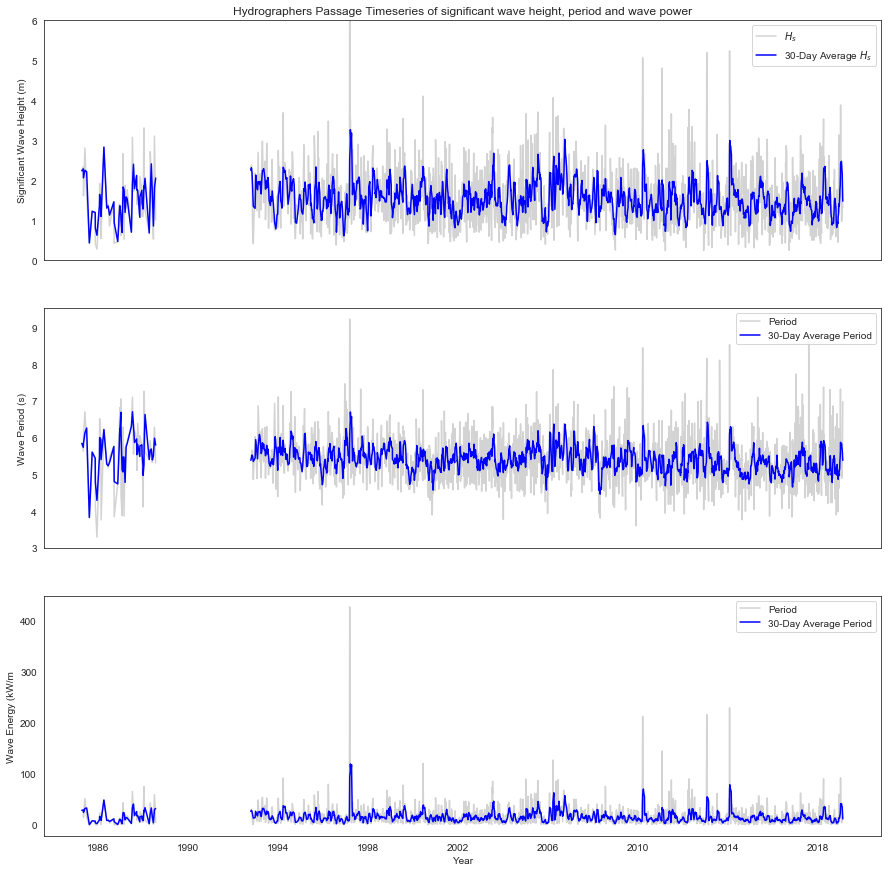

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex = True,figsize = (15,15))    


sns.set_style("white")
#fig.title("Innisfail 30 Day Moving Average Significant Wave Height")


#HS
#Before date break
ax1.plot(x1,y1,color='lightgrey',label="$H_s$")
ax1.plot(x1,yy1,color='blue',label="30-Day Average $H_s$")

#After date break
ax1.plot(x2,y2,color='lightgrey', label='False')
ax1.plot(x2,yy2,color='blue')

ax1.legend(labels=["$H_s$","30-Day Average $H_s$"], loc='upper right')
ax1.set_ylabel("Significant Wave Height (m)")
ax1.set_ylim(0,6)


#Wave Period 
#Before date break
ax2.plot(x1, time1, color='lightgrey')
ax2.plot(x1,tt1,color='blue')

#After date break
ax2.plot(x2,time2, color='lightgrey')
ax2.plot(x2,tt2,color='blue')

ax2.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax2.set_ylabel("Wave Period (s)")


#Wave Power - Need to add data
#Before date break
ax3.plot(x1, p1,color='lightgrey')
ax3.plot(x1,pp1,color='blue')

#After date break
ax3.plot(x2,p2,color='lightgrey')
ax3.plot(x2,pp2,color='blue')
ax3.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax3.set_ylabel("Wave Energy (kW/m") #Check if watts/metre is correct

ax1.set_title('Hydrographers Passage Timeseries of significant wave height, period and wave power')
#Formatting

plt.xlabel("Year")

#"years = pd.date_range(start='1985',end='2020', periods=10)
years = pd.date_range('2008','2015', freq='AS')

plt.savefig("Hydrographers_timeseries")

In [73]:
max(wh)

6.8699378967285165

In [74]:
for k in range(len(days)):
    if wh[k]>6:
        print wh[k], alltime[k]

6.8699378967285165 1997-03-08 16:58:09.695312


In [40]:
for k in range(len(days)):
    if powr>400:
        print powr[k],wh[k], alltime[k]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Make month-year df

In [75]:
r = netCDF4.num2date(tt[days],u'days since 1985-01-01 00:00:00 UTC')


In [76]:
# use this to make year/month df

def getMeanH(month,year):
    valwh = []
    for k in range(len(days)):
        if r[k].year == year and r[k].month == month:
            valwh.append(wh[days[k]])

    return np.mean(valwh)


monthYear = []
for k in range(1,13):
    monthYear.append(getMeanH(k,2018))

print monthYear,
#     print alltime[k].year #,wh[days[k]]



[1.3129720434877608, 1.2741128996724174, 1.7020088087944758, 2.3466952047316854, 1.5864599614949868, 1.342696315523178, 1.3333649778789054, 0.9374504864166014, 1.558715076749287, 0.7987738703924513, 1.132318799761544, 1.8573764006650952]


## Seasonal Kendall Test

In [77]:
nameCSV = 'hydrowh_my_no_nan_long.csv'
no_nan = pd.read_csv(str(nameCSV))
no_nan.set_index('Date')

,Wh
Date,
19931,1.762222
19932,2.699450
19933,1.658841
19934,2.573696
19935,2.032772
19936,1.840281
19937,1.525691
19938,1.559440
19939,1.722712


In [78]:
import pymannkendall as mk
seasonal = mk.seasonal_test(no_nan, period=12)
seasonal

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=10.005286243454291, Tau=0.26852996949459973, s=26056.0, var_s=6781458.666666667, slope=0.005892414339703)

In [79]:
max(df.power)

427.07862884622466

In [80]:
np.mean(df.power)

15.881981186391908

# PLOT

In [81]:
import geopandas as gpd
from shapely.geometry import Point,Polygon

In [107]:
geometry = [Point(xy) for xy in zip('lon','lat')]

geo_df = gpd.GeoDataFrame(df_9, geometry)

TypeError: a float is required

In [92]:
latt = lat[geo_df]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

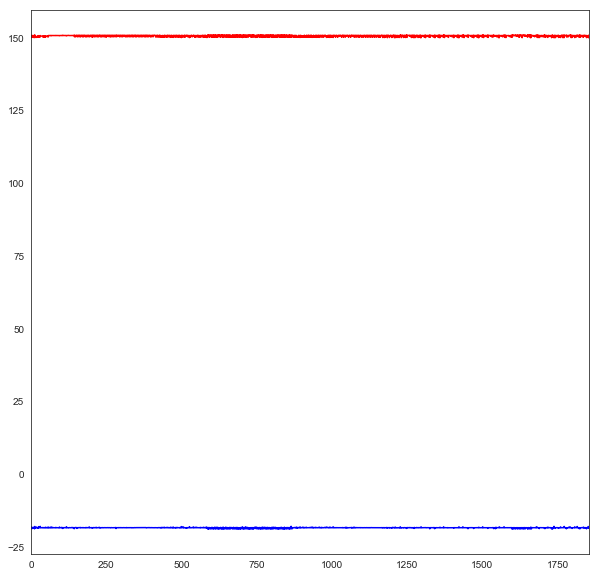

In [168]:
fig, ax = plt.subplots(figsize=(10,10))

geo_df['lat'].plot(color='b')
geo_df['lon'].plot(color='r')

In [169]:
#plt.scatter(lon,lat, color='r', marker='.')
plt.scatter(wh, color='b', marker='.')

TypeError: scatter() takes at least 2 arguments (2 given)

In [ ]:
gdf = GeoDataFrame(geo_df)

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

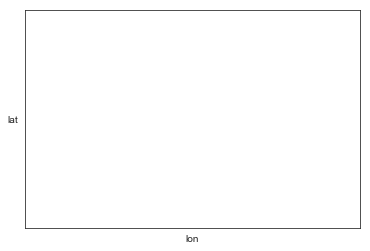

In [106]:
plt.scatter(x="lon",y="lat", s="wh", colorbar=True, alpha=0.4, cmap=plt.get_cmap("jet"))
plt.legend()
plt.show()





In [108]:
import cartopy
import cartopy.feature as cpf

In [140]:
longi = lon[days]
len(longi)
lati = lat[days]
len(lati)

1856

In [159]:
waveheight = []
waveheight.append(dayswh)

In [160]:
waveheight

[array([2.23811793, 2.33500028, 1.61039996, ..., 1.51025009, 1.31061109,
        1.69944456])]

In [165]:
for k in range (len(days)):
    if 1<dayswh[k]<2:
        colour = 'b'

In [166]:
colour

'b'

In [170]:
colour = []
for k in range (len(days)):
    if dayswh[k]<1:
        color = 'b'
    elif 1<dayswh[k]<2:
        color = 'g'
    elif 2<dayswh[k]<3:
        color = 'o'
    elif 3<dayswh[k]<4:
        color = 'p'
    elif dayswh[k]>4:
        color = 'r'
    else:
        color = 'b'
    colour.append(color)

In [172]:
len(colour)

1856

AttributeError: 'function' object has no attribute 'Normalize'

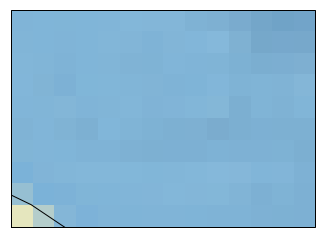

In [181]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([147, 154, -15, -20], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)

ax.stock_img()

sst = 

cmap = plt.cm.get_cmap('viridis')
normalize = plt.colors.Normalize(vmin=min(dayswh), vmax=max(dayswh))
colors = [cmap(normalize(value)) for value in z]
ax.scatter(lon, wh, color=colors)
#plt.scatter(longi,lati,s=wh, c=colour, alpha=0.5, actransform=ccrs.PlateCarree())


plt.show()

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces_lines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


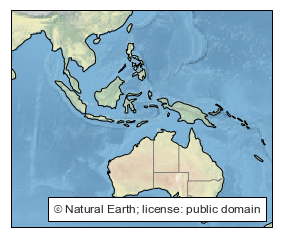

In [110]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText


def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([80, 170, -45, 30], crs=ccrs.PlateCarree())

    # Put a background image on for nice sea rendering.
    ax.stock_img()

    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

    SOURCE = 'Natural Earth'
    LICENSE = 'public domain'

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(states_provinces, edgecolor='gray')

    # Add a text annotation for the license information to the
    # the bottom right corner.
    text = AnchoredText(r'$\mathcircled{{c}}$ {}; license: {}'
                        ''.format(SOURCE, LICENSE),
                        loc=4, prop={'size': 12}, frameon=True)
    ax.add_artist(text)

    plt.show()


if __name__ == '__main__':
    main()

TypeError: Input z must be a 2D array.

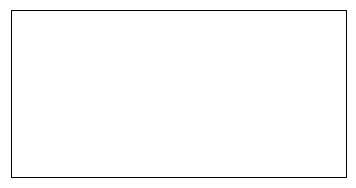

In [183]:
import os
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import numpy as np

from cartopy import config
import cartopy.crs as ccrs


# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'netcdf', 'HadISST1_SST_update.nc'
                     )

dataset = netcdf_dataset(fname)
lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
st = dataset.variables['sst'][0, :, :]


ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lon, lat, wh, 60,
             transform=ccrs.PlateCarree())

ax.coastlines()

plt.show()

TypeError: You must first set_array for mappable

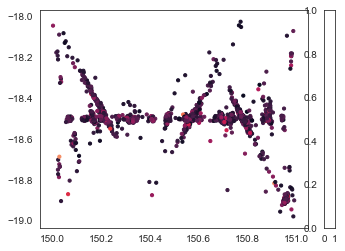

In [220]:
marker_size = 10
plt.scatter(data.values[:,1],data.values[:,0], marker_size, c=data.values[:,2])



cmap=plt.cm.get_cmap('coolwarm')

#cbar = plt.colorbar()
#cbar.set_label("Wave Height (m)")
#cmplt.cm.get_cmap
# cmap = plt.cm.cool

# #norm = plt.colors.Normalize(vmin=0,vmax=7)
# cb1 = plt.colorbar.ColorbarBase(ax,cmap=cmap,norm=norml)

plt.colorbar(cbar)
plt.title("Point observations")
plt.xlabel("Lon")
plt.ylabel("Lat")            

plt.show()
            #wh = data.values[:,2]

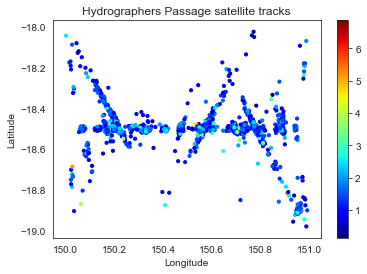

In [229]:
fig, ax = plt.subplots()

marker_size = 10
im = ax.scatter(data.values[:,1],data.values[:,0], marker_size, c=data.values[:,2], cmap=plt.cm.jet)

#plt.colorbar(ax=ax,cmap=coolwarm, values=sorted(c))
#cbar()
#cmap=plt.cm.get_cmap('coolwarm')

#cbar = plt.colorbar()
#cbar.set_label("Wave Height (m)")
#cmplt.cm.get_cmap
# cmap = plt.cm.cool

# #norm = plt.colors.Normalize(vmin=0,vmax=7)
# cb1 = plt.colorbar.ColorbarBase(ax,cmap=cmap,norm=norml)



# cmap=plt.cm.get_cmap('coolwarm')
fig.colorbar(im, ax=ax)

plt.title("Hydrographers Passage satellite tracks")
plt.xlabel("Longitude")
plt.ylabel("Latitude")            

plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'coastlines'

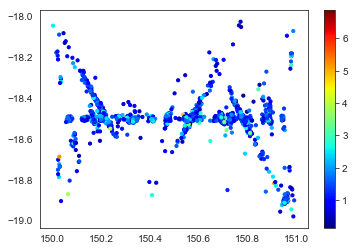

In [230]:
from cartopy import config
import cartopy.crs as ccrs

fig, ax = plt.subplots()

marker_size = 10
im = ax.scatter(data.values[:,1],data.values[:,0], marker_size, c=data.values[:,2], cmap=plt.cm.jet)

#plt.colorbar(ax=ax,cmap=coolwarm, values=sorted(c))
#cbar()
#cmap=plt.cm.get_cmap('coolwarm')

#cbar = plt.colorbar()
#cbar.set_label("Wave Height (m)")
#cmplt.cm.get_cmap
# cmap = plt.cm.cool

# #norm = plt.colors.Normalize(vmin=0,vmax=7)
# cb1 = plt.colorbar.ColorbarBase(ax,cmap=cmap,norm=norml)



# cmap=plt.cm.get_cmap('coolwarm')
fig.colorbar(im, ax=ax)
ax.coastlines()

plt.title("Hydrographers Passage satellite tracks")
plt.xlabel("Longitude")
plt.ylabel("Latitude")            

plt.show()